# Complex Networks and Generative Models

## Complex Networks in Graph Theory

Complex networks are a class of graphs that represent **large, irregular, heterogeneous, and dynamic real-world systems**. Unlike classical graphs (regular lattices, complete graphs, or simple random graphs), complex networks typically exhibit structural patterns found in natural, social, and technological systems.

---

##  What Is a Complex Network?

A **complex network** is a graph whose topology reflects complicated and non-uniform relationships among many interacting components (nodes).  
They are commonly used to model:

- social interactions  
- biological systems  
- communication and transportation networks  
- scientific collaboration or citation networks  
- technological infrastructures  

In short:

> **Any real-world system with many entities (nodes) and non-trivial interaction patterns (edges) is considered a complex network.**

---

##  Key Characteristics of Complex Networks

### 1. **Sparsity**
Most real-world networks are *sparse*:  
the number of edges is much smaller than the maximum possible number of edges.

### 2. **Heterogeneous Degree Distribution**
Nodes do not have similar degrees.  
A few nodes may have extremely high degree (called **hubs**), while most have low degree.

This is typical in **scale-free networks**.

---

### 3. **Community Structure**
Nodes often form *clusters* or *communities* where internal connections are denser than external ones.
Examples:
- friendship groups in social networks  
- functional modules in biological networks  

---

### 4. **Power-Law Degree Distribution**
Many complex networks follow:

$$
P(k) \sim k^{-\gamma}
$$

This means:
- high-degree nodes are rare but important  
- there is no fixed “typical” degree  

---

### 5. **Small-World Property**
Most node pairs can be connected through very short paths.

> This is related to the famous “six degrees of separation”.

---

### 6. **Scale-Free Structure**
The network has **no characteristic scale** for node degree.  
A few hubs dominate the connectivity and play a key role in stability or failure of the network.

---

##  Examples of Real-World Complex Networks

### ● Social Networks  
Users are nodes; “follow” or “friendship” relations are edges.

### ● Biological Networks  
Protein-protein interaction networks, metabolic pathways.

### ● Technological Networks  
Internet topology, power grids, transportation networks.

### ● Scientific Networks  
Co-authorship networks, citation networks.

---

##  Why Are They Called “Complex”?

Because their structure includes:
- irregular patterns  
- long-tailed degree distributions  
- hierarchical communities  
- multi-scale behavior  
- dynamic evolution  

And because many computational problems on these networks are **NP-hard**.

---

# Why Use Generative Models for Graphs?

Even when real-world graph datasets are available, **generative models** play a crucial role:

1. **Data Augmentation**  
   Real datasets are often small or sparse. Generative models can produce additional graphs with similar structural patterns, improving model training and reducing overfitting.

2. **Algorithm Testing & Simulation**  
   Generative graphs allow testing algorithms on larger or variant networks, enabling robust evaluation beyond limited real data.

3. **Privacy Preservation**  
   Synthetic graphs mimic real structures without exposing sensitive information from the original dataset.

4. **Understanding Graph Structure**  
   By learning the underlying distribution, generative models reveal common motifs, community structures, and degree patterns.

5. **Designing New Graphs**  
   They enable creation of graphs with desired properties, useful in network design, chemistry, or social network analysis.

**In short:** even with real graphs, generative models provide scalability, safety, insight, and creative control that real data alone cannot offer.

---

##  Generative Models for Complex Networks

### **1. Erdős–Rényi (ER) Random Graph**
- Simplest probabilistic model  
- Does *not* capture real-world complexity very well  

### **2. Watts–Strogatz Small-World Model**
- Explains clustering + short path lengths

### **3. Barabási–Albert (BA) Scale-Free Model**
- Based on *preferential attachment*  
- Explains the existence of hubs

### **4. Stochastic Block Models (SBM)**
- Used for modeling **community structure**

---

## 1. Erdős–Rényi Random Graph Model $ G(n, p) $)

### Model Definition
- G(n, p): n nodes, each possible edge exists independently with probability p.
- G(n, M): n nodes, exactly M edges placed randomly.

**Generation Process:**

1. Start with $N$ isolated nodes.  
2. For each pair of nodes $(i, j)$, create an edge with probability $p$ independently of other edges.  


**Number of possible edges**:
$$
M = \binom{n}{2}
$$

**Degree distribution**:
$$
P(k) = \binom{n-1}{k} p^k (1-p)^{n-1-k}
$$
For large $ n $, approximates Poisson:
$$
P(k) \approx \frac{\lambda^k e^{-\lambda}}{k!}, \quad \lambda = p(n-1)
$$

**Average degree**:
$$
\langle k \rangle = p (n-1)
$$

**Phase transition**: A giant connected component emerges when:
$$
p_c = \frac{1}{n}
$$

 
- **Properties**:
  - **Degree distribution**: Approximately Poisson; most nodes have degree near the mean.
  - **Clustering coefficient**: Low, triangles are rare.
  - **Average path length**: Short, due to random connections.
  - **Connectivity**: A giant component emerges when p > 1/n.
  - **Structure**: Completely random, no hubs or lattice-like patterns.

> **Note:** Not suitable for scale-free or small-world networks; often used as a baseline in motif discovery and real network comparison.


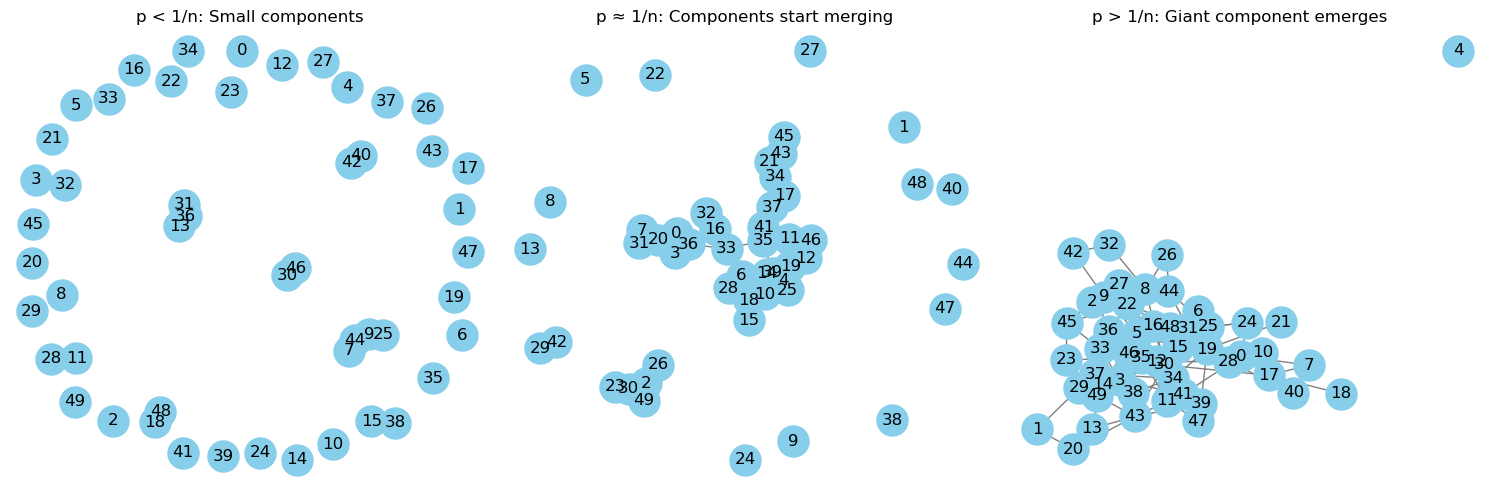

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 50  # number of nodes (for visualization, small n)
p_values = [0.01, 0.03, 0.08]  # below, near, above critical p (~1/n)
titles = ["p < 1/n: Small components",
          "p ≈ 1/n: Components start merging",
          "p > 1/n: Giant component emerges"]

plt.figure(figsize=(15, 5))

for i, p in enumerate(p_values, 1):
    G = nx.erdos_renyi_graph(n, p)
    pos = nx.spring_layout(G, seed=42)  # fixed layout for clarity
    plt.subplot(1, 3, i)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    plt.title(titles[i-1], fontsize=12)

plt.tight_layout()
plt.show()



---

## 2. Small-world Networks

### Definition
A **small-world network** has:
1. **High clustering coefficient** (*like regular lattices*).
2. **Short average path length** (*like random graphs*).

Formally:
- Let $ G = (V, E)$ with $ n = |V|$ and $ m = |E|$.
- **Clustering coefficient** For a **single node $v$**, the clustering coefficient is defined as the fraction of possible triangles through that node that actually exist:

$$
C_v = \frac{\text{Number of triangles involving } v}{\frac{k_v (k_v - 1)}{2}}
$$

where $k_v$ is the degree of node $v$, and the denominator represents the maximum number of possible edges between its neighbors.  


- **Average clustering coefficient**:
$$
\overline{C} = \frac{1}{n} \sum_{v \in V} C_v
$$

- **Average path length**:
If $l_i$ is the average path length between the node $i$ and 
all the other nodes, the characteristic path length is computed as follows:

$$\displaystyle \frac{1}{q(q-1)} \sum_{i \in V} l_i$$

Here, $V$ is the set of nodes in the graph and $q=|V|$ represents its order. 


**Small-world property**:  
$$
\overline{C} \gg C_{\text{random}}, \quad L \approx L_{\text{random}}
$$

- **$C_{random}$**: The average clustering coefficient of a random graph with the same number of nodes and edges.  
  - In random graphs, nodes are connected randomly, so the probability of forming triangles is low.  

- **$L_{random}$**: The average shortest path length in the same random graph.  
  - Even with random connections, short paths exist due to random shortcuts, so L_random is usually small.


### Watts–Strogatz (WS) Model to create a Small-world network
1. Start with a regular ring lattice where each node is connected to  $k/2$ of its right nearest neighbors and  $k/2$ of its left nearest neighbors.
2. With probability $p$, rewire each edge to a randomly chosen node.

- **Parameters**: 
  - $ n$: number of nodes  
  - $k $: mean degree  
  - $p $: rewiring probability

> **Intuition:** Small rewiring keeps high clustering but reduces path length, creating the **small-world effect**.

---

## 3. Scale-free Networks

### Definition
A network is **scale-free** if its degree distribution follows a **power law**:
$$
P(k) \sim k^{-\gamma}
$$
with $ 2 < \gamma < 3 $ in most empirical networks.

**Interpretation:**  
Most nodes have few connections, but a small number of nodes (**hubs**) have extremely high degree.

### Statistical Properties
- **Heavy-tailed distribution**: Large-degree nodes (hubs) appear with non-negligible probability.  
- **Robustness**: Resistant to random node failures but vulnerable to targeted attacks on hubs.  
- **Relevance in GNNs / Graph Mining:** Hubs can dominate message passing in GNNs or bias motif counts.


---


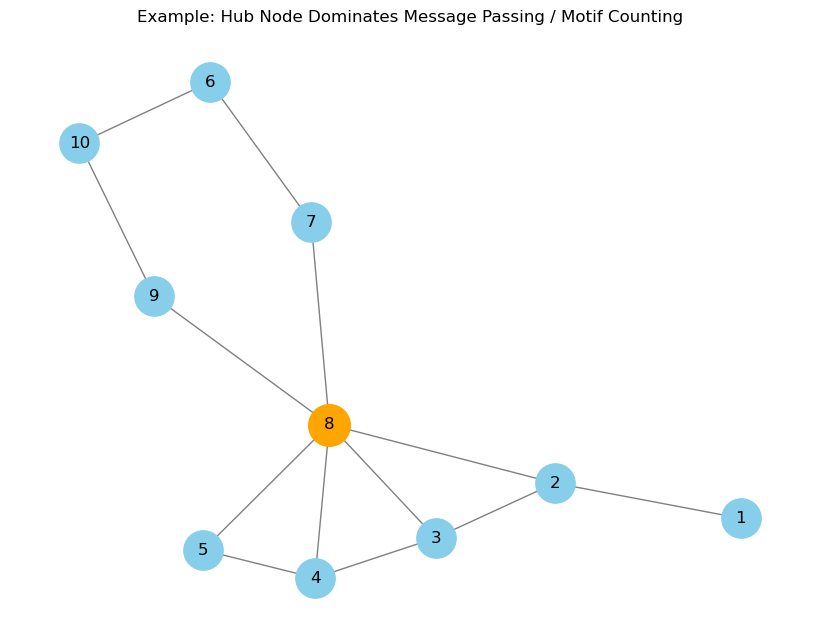

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a small graph with a hub
G = nx.Graph()

# Add nodes
nodes = list(range(1, 11))  # 10 nodes
G.add_nodes_from(nodes)

# Define hub and edges
hub = 8
edges = [
    (hub, 2), (hub, 3), (hub, 4), (hub, 5),  # hub connections
    (1,2), (2, 3), (3, 4), (4, 5),  # small cluster connections
    (6, 7), (7, 8), (8, 9), (9, 10), (10, 6)  # another cluster
]
G.add_edges_from(edges)

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw graph
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=800)

# Highlight the hub
nx.draw_networkx_nodes(G, pos, nodelist=[hub], node_color='orange', node_size=900)

plt.title("Example: Hub Node Dominates Message Passing / Motif Counting", fontsize=12)
plt.show()




##  Barabási–Albert (BA) Preferential Attachment Model

### Idea
Networks grow over time, and new nodes prefer to connect to already well-connected nodes.

### Algorithm
1. Start with a small connected network of $ m_0$ nodes.
2. At each step, add a new node with $ m \le m_0 $ edges.
3. **Attachment probability** for adding a new edge to the existing node $ i$:
$$
\Pi(k_i) = \frac{k_i}{\sum_{j} k_j}
$$
where $ k_i $ is the current degree of node $ i$.

### Properties
- Produces a power-law degree distribution with:
$$
P(k) \sim k^{-3}
$$
- Captures the **rich-get-richer** phenomenon.
- Commonly observed in social networks, WWW, and citation networks.

---
# 4. Stochastic Block Model (SBM)

## Idea
- SBM generates graphs with **community structure**.
- Nodes are partitioned into **k blocks (communities)**.
- The probability of an edge between two nodes depends on their community membership.

## Algorithm
1. Assign each node to a community.
2. Define a **k × k matrix P** with connection probabilities:
   - \(P_{ab}\) = probability of connecting a node in community a to a node in community b.
3. For each pair of nodes (i, j):
   - Identify their communities (a, b)
   - Add an edge with probability \(P_{ab}\)

## Properties
- Captures **modular or clustered structure**
- Allows **flexible intra- and inter-community connectivity**
- Random but preserves community structure




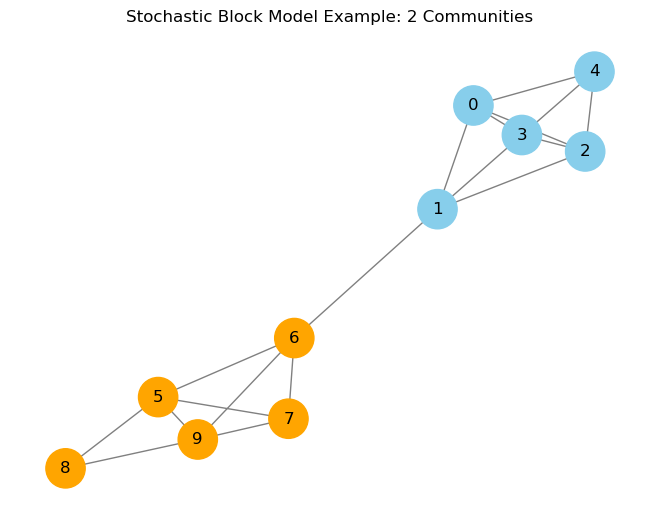

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 10  # number of nodes
k = 2   # number of communities
sizes = [5, 5]  # nodes per community
p_in = 0.8      # probability within community
p_out = 0.1     # probability between communities

# Create probability matrix
P = np.array([[p_in, p_out],
              [p_out, p_in]])

# Generate SBM graph
G = nx.stochastic_block_model(sizes, P, seed=42)

# Assign colors to communities
colors = ['skyblue']*sizes[0] + ['orange']*sizes[1]

# Draw graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=800)
plt.title("Stochastic Block Model Example: 2 Communities", fontsize=12)
plt.show()



## Comparison of Models

| Model                    | Scientific Category       | Degree Distribution                   | Clustering | Average Path Length | Main Feature                                                                                  | Real-world Examples                                                   |
| ------------------------ | ------------------------ | ------------------------------------ | ---------- | ----------------- | --------------------------------------------------------------------------------------------- | --------------------------------------------------------------------- |
| **Erdős–Rényi (ER)**     | Random graph / baseline  | Approximately Poisson                 | Low        | Short             | Each edge exists independently with probability (p)                                           | Random communication networks, simple peer-to-peer connections       |
| **Watts–Strogatz (WS)**  | Small-world              | Narrow (like lattice)                 | High       | Short             | Lattice network with small rewiring; preserves clustering while reducing path length         | Friendship networks, neural networks, power grids                     |
| **Barabási–Albert (BA)** | Scale-free               | Power-law ($P(k) \sim k^{-3}$)       | Low–Medium | Short             | Network growth + preferential attachment → hubs (rich-get-richer)                             | World Wide Web, citation networks, airline routes, metabolic networks |
| **Stochastic Block Model (SBM)** | Community / modular networks | Can be arbitrary (depends on P matrix) | Medium–High | Medium–Short      | Nodes assigned to communities; intra-community edges denser than inter-community edges       | Social networks with communities, collaboration networks, biological networks |


---

##  Applications

- **Epidemiology:** Predict disease spread in social networks.  
- **Web Science:** Modeling hyperlink structures.  
- **Biology:** Protein-protein interaction networks, gene regulation.  
- **Infrastructure:** Power grid resilience and transportation networks.  
- **Graph ML & Motif Mining:** Understanding network topology guides **sampling, feature design, and motif extraction**.

---

## 8. References

- Watts, D. J., & Strogatz, S. H. (1998). *Collective dynamics of 'small-world' networks*. Nature.  
- Barabási, A.-L., & Albert, R. (1999). *Emergence of scaling in random networks*. Science.  
- Erdős, P., & Rényi, A. (1959). *On Random Graphs*. Publicationes Mathematicae.  



--- Network Models Summary ---

Erdős–Rényi (Random Graph):
  Nodes                    : 500
  Edges                    : 2437
  Avg Degree               : 9.7480
  Degree Std               : 3.0319
  Avg Clustering           : 0.0161
  Transitivity             : 0.0166
  Avg Shortest Path (GCC)  : 2.9674
  Fraction Nodes in GCC    : 1.0000
  Estimated power-law exponent (gamma) from tail: 1.5496 (k_min=2, tail size=500)

Watts–Strogatz (Small-world):
  Nodes                    : 500
  Edges                    : 1500
  Avg Degree               : 6.0000
  Degree Std               : 0.5367
  Avg Clustering           : 0.5279
  Transitivity             : 0.5194
  Avg Shortest Path (GCC)  : 6.9900
  Fraction Nodes in GCC    : 1.0000
  Estimated power-law exponent (gamma) from tail: 1.7235 (k_min=2, tail size=500)

Barabási–Albert (Scale-free):
  Nodes                    : 500
  Edges                    : 1491
  Avg Degree               : 5.9640
  Degree Std               : 6.8521
  Avg Cl

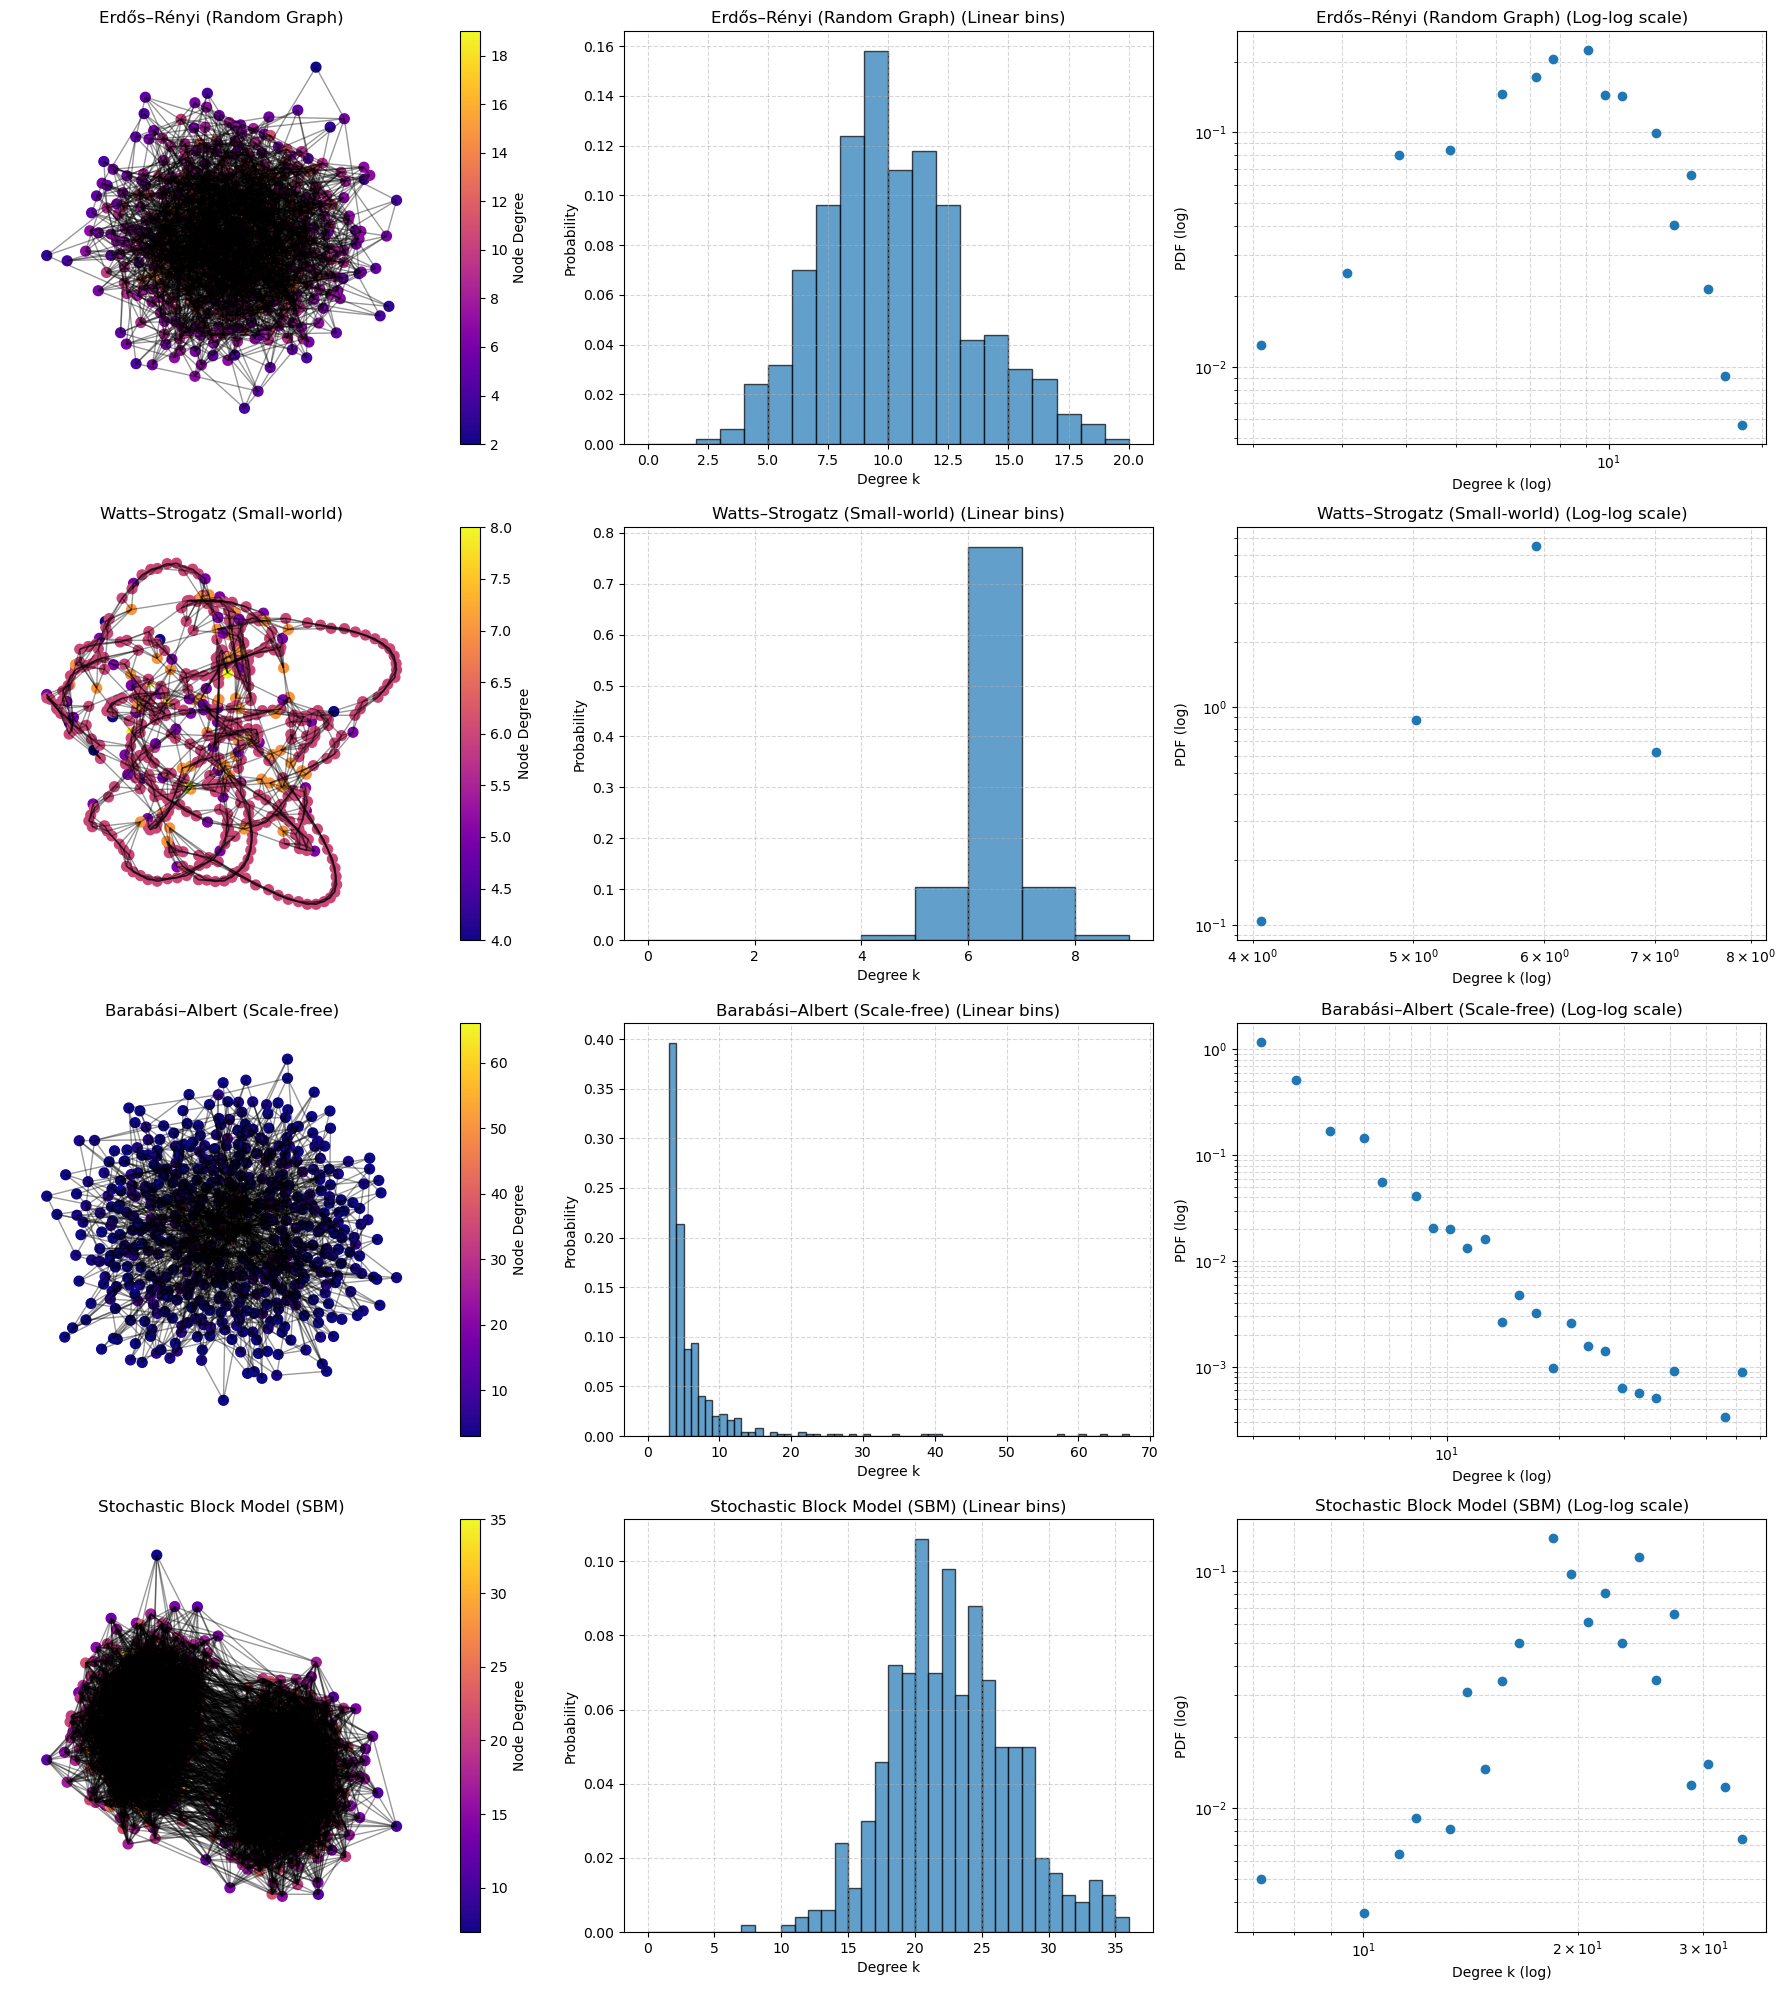

In [15]:
# --- Graph Model Generators ---

def generate_erdos_renyi(n, p, seed=None):
    return nx.erdos_renyi_graph(n, p, seed=seed)

def generate_watts_strogatz(n, k, p_rewire, seed=None):
    return nx.watts_strogatz_graph(n, k, p_rewire, seed=seed)

def generate_barabasi_albert(n, m, seed=None):
    return nx.barabasi_albert_graph(n, m, seed=seed)

def generate_stochastic_block_model(sizes, p_matrix, seed=None):
    """
    Generates a Stochastic Block Model (SBM) graph.
    
    Parameters:
    - sizes: list of integers, number of nodes in each community
    - p_matrix: k x k matrix of connection probabilities between communities
    """
    return nx.stochastic_block_model(sizes, p_matrix, seed=seed)


# --- Main Demo Function ---

def demo(n=500, er_p=0.02, ws_k=6, ws_p=0.05, ba_m=3,
         sbm_sizes=[250, 250], sbm_p_in=0.08, sbm_p_out=0.01,
         seed=42):
    np.random.seed(seed)

    # Generate graphs
    G_er = generate_erdos_renyi(n, er_p, seed=seed)
    G_ws = generate_watts_strogatz(n, ws_k, ws_p, seed=seed)
    G_ba = generate_barabasi_albert(n, ba_m, seed=seed)

    # SBM probability matrix
    k = len(sbm_sizes)
    p_matrix = [[sbm_p_in if i==j else sbm_p_out for j in range(k)] for i in range(k)]
    G_sbm = generate_stochastic_block_model(sbm_sizes, p_matrix, seed=seed)

    fig, axes = plt.subplots(4, 3, figsize=(18, 20))  # 4 models now

    graph_data = [
        ("Erdős–Rényi (Random Graph)", G_er),
        ("Watts–Strogatz (Small-world)", G_ws),
        ("Barabási–Albert (Scale-free)", G_ba),
        ("Stochastic Block Model (SBM)", G_sbm)
    ]

    print("\n--- Network Models Summary ---\n")

    for i, (name, G) in enumerate(graph_data):
        plot_graph(G, title=name, ax=axes[i, 0])
        plot_degree_distribution(G, ax_linear=axes[i, 1], ax_log=axes[i, 2], title=name)

        stats = graph_summary_stats(G)
        degs = degree_distribution(G)
        gamma_hat, k_min, tail_size = estimate_power_law_exponent(degs, k_min=2)

        print(f"{name}:")
        for key, val in stats.items():
            print(f"  {key:25}: {val:.4f}" if isinstance(val, float) else f"  {key:25}: {val}")
        print(f"  Estimated power-law exponent (gamma) from tail: {gamma_hat:.4f} (k_min={k_min}, tail size={tail_size})\n")

    plt.tight_layout()
    plt.show()


# --- Run demo when executed as script ---
if __name__ == "__main__":
    demo()
